# Malaria Data Science Project
by Mervin Keith Cuadera, Jacob Speigel, and Lane Fitzsimmons

## Introduction

Malaria still poses a major impact on world health, with an estimated 229 million clinical cases occurring in 2019 ([WHO, 2019](https://www.who.int/news-room/feature-stories/detail/world-malaria-report-2019)). An important component in malaria transmission is temperature, as both the _Plasmodium_ parasite and the main mosquito vector, _Anopheles_ mosquitoes, are sensitive to it ([CDC, 2020](https://www.cdc.gov/malaria/about/distribution.html)). Although the majority of malaria cases occur in sub-Saharan Africa and in parts of Asia, climate change and increased globalization may cause this disease to spread further. Predicting which countries are at risk for higher numbers of malaria cases is essential for proactively providing public health support. In analyzing country variables such as average temperature, GDP per capita, and geography, we hope to create a model that predicts where malaria cases are likely to occur or increase.

### Research Question
Can we predict where higher rates of malaria are more likely to occur, based on geography, average temperature, and GPD per capita?

## Data Description

#### Motivation

**Why were these datasets created?**

The datasets on malaria incidences, cases and deaths were created by the World Health Organization to better understand the threat of malaria in observed countries. Observations of trends in the data can assist in the WHO’s efforts to eradicate the disease. We combined these three datasets to observe trends in malaria incidence, case number and deaths by country and by year. These trends may reveal insights about the spread of the disease, and pinpoint areas where malaria incidence has declined to allow further investigation into these places. 

For the World Bank dataset, it was created to "identify effective public and private actions, set goals and targets, monitor progress and evaluate impacts."

The Earth surface temperature dataset, which was obtained in Kaggle, was created to understand the trends in global temperatures with respect to finding evidence for climate change. 

**Who created the datasets?**

The World Health Organization funded the dataset, which is an organization under the direction of the United Nations. The World Bank dataset was created by the World Bank, United Nations Population Division, and US Census Bureau. The Earth surface temperature dataset was compiled by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. 

**Who funded the creation of the datasets?**

The WHO is funded largely by Member States and UN organizations. 
The World Bank is capitally funded by member countries/organizations. 
The Earth surface temperature data is fully funded through charitable contributions from unrestricted grants from donor organizations, as well as the U.S. Department of Energy.

#### Composition

**What are the observations (rows) and the attributes (columns)?**

The observations represent data collected in a country for a given year. The attributes in the final dataset include Year, Country, Incidence (the number of cases per 1,000 people), Deaths (confirmed deaths from malaria), confirmed cases, Region (using WHO Classification), and Global South (whether or not the country is a developing nation - Global North if it is developed), Gross Domestic Product per Capita adjusted for Purchase Power Parity (GDPpcPPP), and average temperature recorded for the year. We adjusted GDP per capita with purchase power parity since the cost of living between countries can be highly variable, and this adjustment allows for more equal comparisons.


**Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctor/patient confidentiality, data that includes the content of individuals’ non-public communications)?**

No, this data is publicly available. 

**Over what timeframe was the data collected?**

2000 to 2013

**Is any information missing from individual instances?**

An important piece of data missing from the observations is the population of the country at the time the observation was taken. It will therefore be more difficult to draw comparisons between the number of deaths in different countries per a set time period. This will be a limitation in our data analysis. There are certain years throughout where information was not collected, for example, Kenya 2006 - 2010. Because of this, there are some gaps in our graphs and analysis. 

#### Collection
**What processes might have influenced what data was observed and recorded and what was not?**

It was certainly difficult for the WHO to record malaria cases in developing countries as a lack of developed healthcare systems likely led to some cases going unreported. The data therefore represents the cases the WHO was able to record, which can still reveal relative trends assuming the WHO used standardized data collection methods.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

It is not explicitly stated whether people were involved in the data collection. The data was “reported” and “confirmed,” meaning that it was likely taken and compiled from existing healthcare systems.

#### Preprocessing/Cleaning:
**What preprocessing was done, and how did the data come to be in the form that you are using?**

The columns were taken from different datasets provided by the WHO on malaria incidence, reported confirmed cases and reported deaths. The column Global South was taken through web scraping this [Wikimedia page](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification) . This data was converted into a DataFrame, and the DataFrames with the data from each source were combined into one DataFrame. This left us with our final dataset.

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

1. [Malaria Cases](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/master/datasets/malaria_confirmed_cases.csv)
2. [Malaria Deaths](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/master/datasets/malaria_deaths.csv)
3. [Malaria Incidence](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/master/datasets/malaria_incidence.csv)
4. [Country Regions](https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification)
5. [Population Data](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/master/datasets/population_data.csv)
6. [GDP per Capita PPP](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/gdppcppp_per_country.csv)
7. [Surface Temperature Data](https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/temp_by_country.csv)

## Pre-registration Assignment

**Overview**

We “pre-registered” two analyses of our data to ensure that we were not selectively choosing analyses that reveal statistically significant results. We did not know whether these analyses would yield interesting results before we performed them.

**Analysis 1: Multivariable Regression of Temperature, GDP and Malaria Incidence**

In phase 3, we committed to create a multivariable linear regression that predicts the incidence of malaria given temperature and GDP by country for the most recent year in our dataset. Temperature and GDP by year and country were not variables in the dataset we used for Phase II, but we added those variables to the final dataset. This was to observe the resulting coefficient of the model and draw conclusions based on that. For instance, if the coefficient is large and positive, we could infer that temperature and GDP together correlate with a higher incidence of malaria in most countries. From the evidence gathered, we discuss in our analysis factors that are likely to impact malaria incidence worldwide, such as change in GDP and global warming.

**Analysis 2: K-Means Clustering**

We committed to perform a k-means clustering analysis to discover ways in which the countries in the dataset can be categorized. This involved trying different clusterings with different values of k. A significant result would be that countries with high, medium and low malaria incidence rates share common categoristics, such as region or temperature change. This analysis provided further insight as to what country characteristics may put countries at a higher risk for the spread of malaria.

## Data Analysis

#### Importing libraries to be used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

plt.rcParams['figure.figsize'] = (10, 5)

#### Loading curated dataset

In [2]:
curated_df_url = 'https://raw.githubusercontent.com/mcuadera/info_2950_malaria_project/main/datasets/malaria_project_curated_data.csv'
malaria_df = pd.read_csv(curated_df_url, index_col=0, parse_dates=True)
malaria_df.head()

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,Afghanistan,9.01,24.0,39263.0,32269589.0,Asia & Pacific,Global South,2015.514962,16.533625
2012-01-01,Afghanistan,11.15,36.0,54840.0,31161376.0,Asia & Pacific,Global South,1914.774351,14.481583
2011-01-01,Afghanistan,18.87,40.0,77549.0,30117413.0,Asia & Pacific,Global South,1699.487997,15.518000
2010-01-01,Afghanistan,15.11,22.0,69397.0,29185507.0,Asia & Pacific,Global South,1710.575645,15.828667
2009-01-01,Afghanistan,14.77,32.0,64880.0,28394813.0,Asia & Pacific,Global South,1519.692548,15.257750


In [3]:
by_year = malaria_df.groupby('Year')
year_2013 = malaria_df.loc['2013-01-01']

### Exploratory Analysis

We first grouped the dataset by year to so that we can determine the overall trends in global malaria over time. We suspected that the averages for these measures per year may have been skewed by certain countries or regions that may have a lot more cases than the rest of the world, so we also graphed the median deaths as a more accurate portrayal of the data's middle value. We also isolated the latest malaria data from our dataset.

##### Malaria cases over time

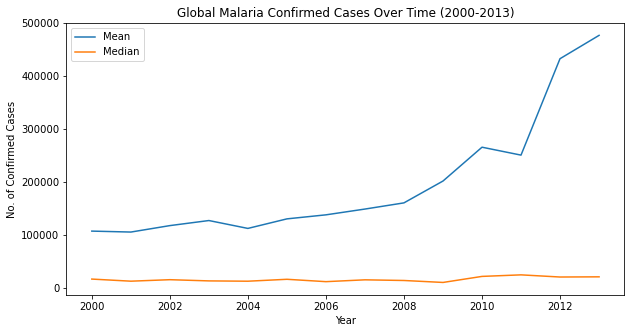

In [4]:
plt.plot(by_year['Confirmed Cases'].mean(), label='Mean')
plt.plot(by_year['Confirmed Cases'].median(), label='Median')
plt.title('Global Malaria Confirmed Cases Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Cases')
plt.legend()
plt.show()

The graph shows that between 2000-2013, the average malaria cases throughout the world have increased. However, the median seems to be fairly constant. We zoomed into the median more because we thought that the line for the average was distorting the trends in median malaria cases.

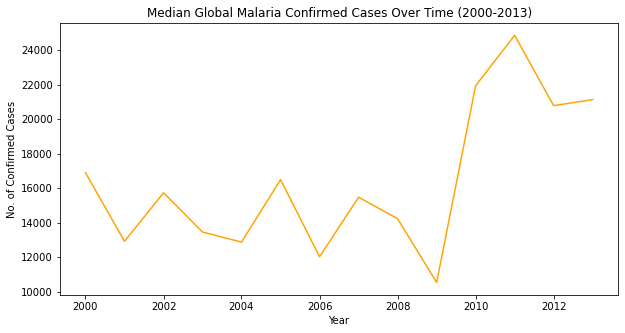

In [5]:
plt.plot(by_year['Confirmed Cases'].median(), color='orange')
plt.title('Median Global Malaria Confirmed Cases Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Cases')
plt.show()

In this graph of media confirmed cases over time, there seems to be a cyclical peak of malaria cases. However, increases in median malaria cases jumped significantly in 2009. Following the patterns from previous years, after a peak in median confirmed cases, following years have reduced median confirmed cases. 

##### Malaria incidence over time

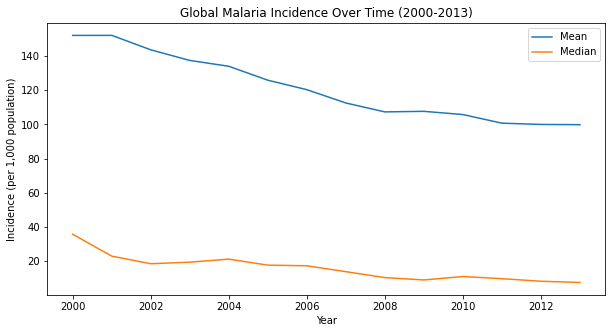

In [6]:
plt.plot(by_year['Incidence'].mean(), label='Mean')
plt.plot(by_year['Incidence'].median(), label='Median')
plt.title('Global Malaria Incidence Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Incidence (per 1,000 population)')
plt.legend()
plt.show()

Unlike the confirmed cases, the incidence of global malaria has decreased over time. However, starting in 2008, it seems like the global incidence has stagnated.

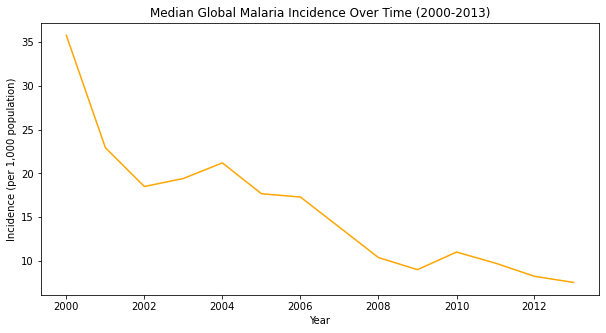

In [7]:
plt.plot(by_year['Incidence'].median(), color='orange')
plt.title('Median Global Malaria Incidence Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

Looking at the median incidence, it suggests a significant reduction in incidence over time. Since 2008, the median malaria incidence has not changed much, but is still much better than compared to previous years. 

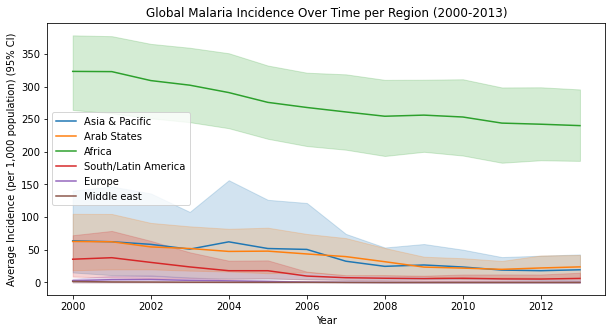

In [8]:
sns.lineplot(x='Year', y='Incidence', hue='Region', data=malaria_df)
plt.title('Global Malaria Incidence Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average Incidence (per 1,000 population) (95% CI)')
plt.legend()
plt.show()

We see that the average malaria incidence in all regions have decreased over time. Africa still has the largest incidence compared to other regions, while other regions seem to be close in terms of average incidence. In 2013, the average malaria incidence was less than 50 for all other regions. We created a separate graph excluding Africa so we can better see the trends in average malaria incidence in the other regions.

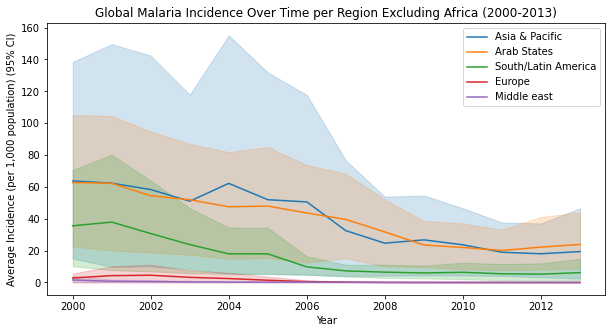

In [9]:
sns.lineplot(x='Year', y='Incidence', hue='Region', data=malaria_df[malaria_df['Region']!='Africa'])
plt.title('Global Malaria Incidence Over Time per Region Excluding Africa (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average Incidence (per 1,000 population) (95% CI)')
plt.legend()
plt.show()

Indeed, in the other regions, there has been a decrease in average malaria incidence such as in the Arab States, Asia & Pacific, and South/Latin America. Asia & Pacific as well as the Arab States seem to have similar incidence over time. Europe and the Middle East seem to have the lowest number of average incidence over time, similar to trends in confirmed cases. 

##### Descriptive statistics of each region

In [10]:
year_2013.groupby('Region').mean().round(2)

,Incidence,Deaths,Confirmed Cases,Total Population,GDPpcPPP,AverageTemperature
Region,,,,,,
Africa,240.12,2216.45,1181532.97,2.397927e+07,4821.69,25.01
Arab States,23.85,112.29,95608.57,1.820491e+07,5897.33,26.77
Asia & Pacific,19.39,79.68,106770.33,1.888158e+08,7932.45,21.15
Europe,0.00,1.00,0.00,2.751461e+07,14295.13,12.02
Middle east,0.00,0.00,11.33,2.232479e+07,37840.77,26.73
South/Latin America,6.15,4.78,18745.50,2.930017e+07,11573.08,24.57


In 2013, Africa was most impacted by malaria, in all measures. Arab State countries were second, and had the second highest average incidence rate and average number of deaths. The Asia and Pacific region closely followed, with the third highest average incidence and average deaths, but was third in confirmed cases. There were a lot of confirmed cases in South/Latin America, although incidence rates and deaths were low. The incidence rate in Europe and Middle East was zero, indicating that countries in this region did not have new malaria cases on average. These two regions also happen to be the most wealthy of all the regions.

##### Distribution of Malaria Cases

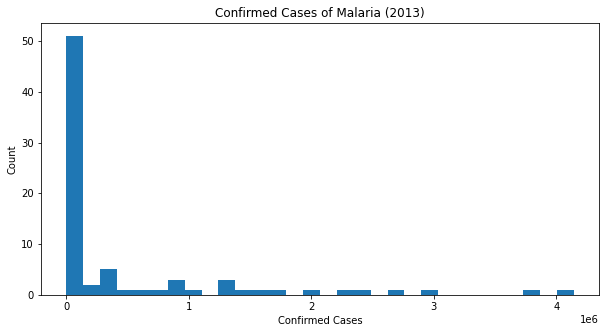

In [11]:
plt.hist(year_2013['Confirmed Cases'], bins=30)
plt.title('Confirmed Cases of Malaria (2013)')
plt.xlabel('Confirmed Cases')
plt.ylabel('Count')
plt.show()

The graph demonstrates that most countries have a low number of confirmed cases, but there is a wide distribution of the number of confirmed cases for a small number of countries. For every additional bin of confirmed cases, there are less and less countries with that amount. 


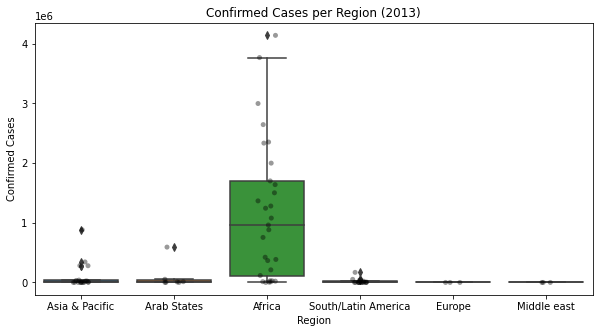

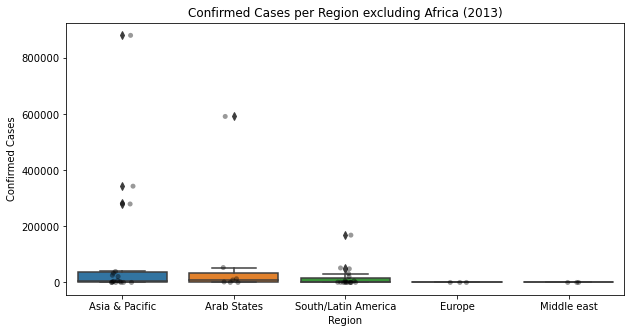

In [12]:
sns.boxplot(x='Region', y='Confirmed Cases', data=year_2013)
sns.stripplot(x='Region', y='Confirmed Cases', data=year_2013, color="black", alpha=0.4)
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases per Region (2013)')
plt.show()

sns.boxplot(x='Region', y='Confirmed Cases', data=year_2013[year_2013['Region']!='Africa'])
sns.stripplot(x='Region', y='Confirmed Cases', data=year_2013[year_2013['Region']!='Africa'], color='black', alpha=0.4)
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases per Region excluding Africa (2013)')
plt.show()

Based on the boxplot, it is obvious that Africa has a much higher number of confirmed cases than the other regions. The other regions have much smaller numbers so that it is difficult to read the boxplots. The following boxplot was created to view the other data without the Africa region data. 

In the boxplot of cases per region without the Africa data, it is more clear that there are more cases per region in Asia & pacific regions as well as arab states. The outlier values for each of those two areas are also more clear in this graph. We explored the countries with the highest burden in Africa, Asia & Pacific, Arab States, and South/Latin America in our Appendix. We also discussed why these countries had such a high burden of malaria in our conclusions section.

##### Distribution of Malaria Incidence

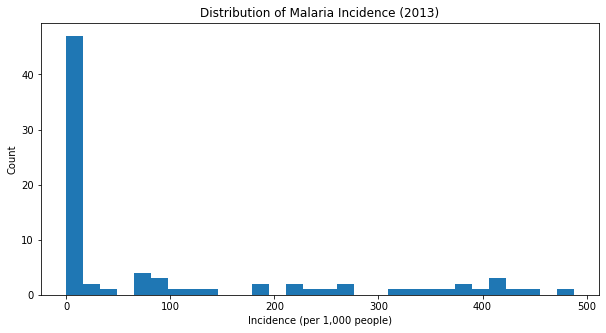

In [13]:
plt.hist(year_2013['Incidence'], bins=30)
plt.title('Distribution of Malaria Incidence (2013)')
plt.xlabel('Incidence (per 1,000 people)')
plt.ylabel('Count')
plt.show()

We graphed the distribution of incidence in 2013 to see how incidence is distributed throughout countries. We see that a significant majority of countries in the world have low incidence (close to zero in this graph). However, there are wide amount of incidence in some of the countries.

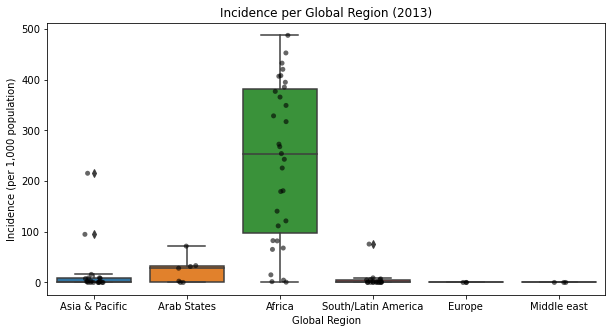

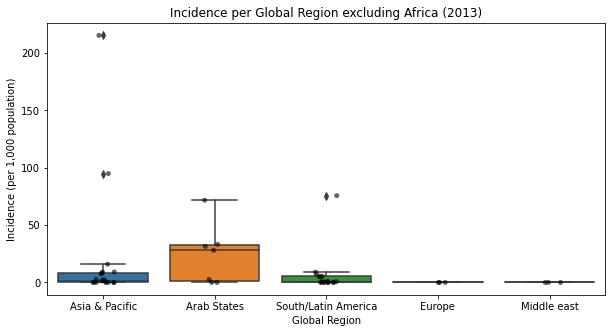

In [14]:
sns.boxplot(x='Region', y='Incidence', data=year_2013)
sns.stripplot(x='Region', y='Incidence', data=year_2013, color='black', alpha=0.6)
plt.title('Incidence per Global Region (2013)')
plt.xlabel('Global Region')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

sns.boxplot(x='Region', y='Incidence', data=year_2013[year_2013['Region']!='Africa'])
sns.stripplot(x='Region', y='Incidence', data=year_2013[year_2013['Region']!='Africa'], color='black', alpha=0.6)
plt.title('Incidence per Global Region excluding Africa (2013)')
plt.xlabel('Global Region')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

We decided to explore the recent trends in malaria cases in the latest year available in the dataset. Unsurprisingly, Africa has the largest median incidence, but also the largest variation in incidence. The Arab States closely follows, and then Asia and Pacific. In Asia and Pacific, there seem to be two countries that have significantly higher incidence compared to the rest of the countries in this region. In South/Latin America, there is one country that seems to have significantly higher incidence compared to the rest of the countries in this region. Europe and Middle East have small malaria incidence. Then, we explored the recent trends in average global temperatures.

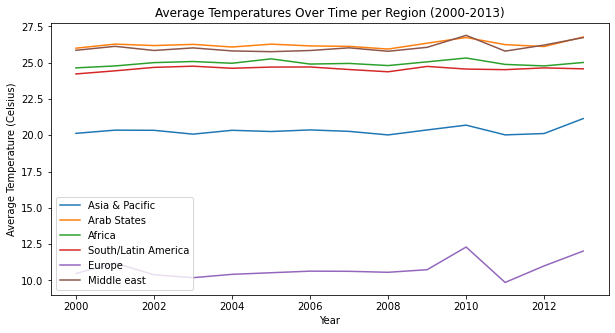

In [15]:
sns.lineplot(x='Year', y='AverageTemperature', hue='Region', data=malaria_df, ci=None)
plt.title('Average Temperatures Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Celsius)')
plt.legend()
plt.show()

The temperatures remained relatively constant over the period 2000 - 2012. We had expected an increase in temperatures over time as a result of global warming, but perhaps this timeframe is too small for an increase to be noticed. 


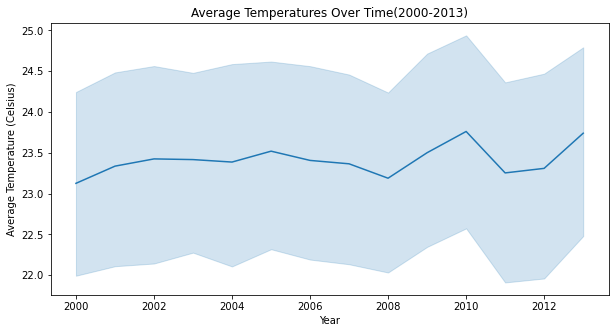

In [16]:
sns.lineplot(x='Year', y='AverageTemperature', data=malaria_df)
plt.title('Average Temperatures Over Time(2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Celsius)')
plt.show()

Similarly, the average trends in temperature over time is relatively steady increasing, although not by much. Further research on global warming suggests that while some regions may get warmer, others may get colder (with less moderation of temperatures globally), so this might keep the average temperatures closer to consistent. After temperature, we looked at one additional variable we use in our model, GDP per capita (adjusted for PPP).

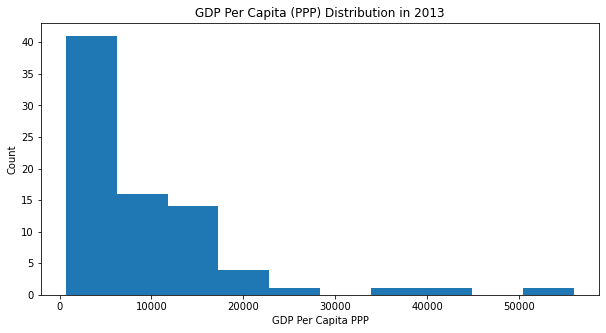

In [17]:
plt.hist(year_2013['GDPpcPPP'])
plt.title('GDP Per Capita (PPP) Distribution in 2013')
plt.xlabel('GDP Per Capita PPP')
plt.ylabel('Count')
plt.show()

The largest group of countries lies in the lowest GDP per capita PPP bin, and there are less and less countries in each subsequent increasing GDP bin. A small number of countries exist in the greatest 40000 and 50000 GDP regions. 

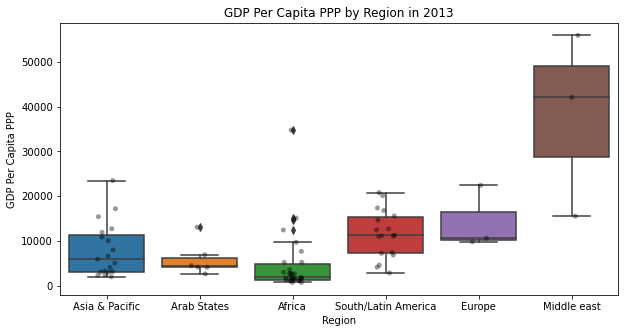

In [18]:
sns.boxplot(x='Region', y='GDPpcPPP', data=year_2013)
sns.stripplot(x='Region', y='GDPpcPPP', data=year_2013, color='black', alpha=0.4)
plt.title('GDP Per Capita PPP by Region in 2013')
plt.xlabel('Region')
plt.ylabel('GDP Per Capita PPP')
plt.show()

The GDP by region indicates the highest GDP per PPP in the Middle East and the lowest in Africa. Africa, again, has high GDP outliers. We wanted to see if there was a correlation between incidence and GDP per capita. 

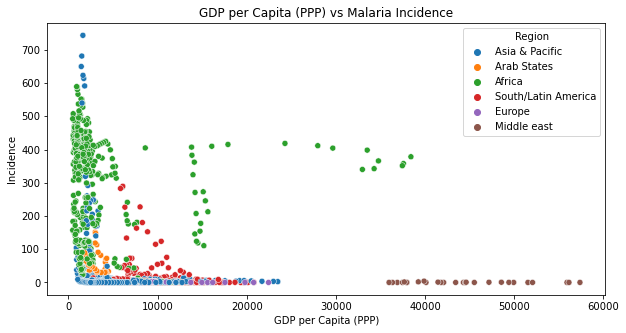

The correlation coefficient between GDP per Capita and Incidence is: -0.31


In [19]:
sns.scatterplot(x='GDPpcPPP', y='Incidence', hue='Region', data=malaria_df)
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Incidence')
plt.title('GDP per Capita (PPP) vs Malaria Incidence')
plt.show()

print('The correlation coefficient between GDP per Capita and Incidence is: {:.2f}'.format(malaria_df['Incidence'].corr(malaria_df['GDPpcPPP'])))

The correlation between GDP per Capita and malaria incidence seems weakly negative, but shows that as GDP per capita increases, malaria incidence decreases overall. It does seem that there are a high amount of low incidence points at high GDP countries, and most of the higher incidence points are lower GDP. The Asia & Pacific region, for instance, seems to have a large variation in GDP with some of the countries with the lowest GDP having high malaria incidence. Africa is clustered mostly at low GDP levels, with a large variation in malaria incidence. Overall, it seems like countries with high GDP tend to have low malaria incidence, whereas countries with low GDP have highly variable malaria incidence levels among them. It is worth noting that our data also contains a lot of zeroes for incidence.

##### Average correlation between GDP per capita and incidence, when grouped by countries

In [20]:
by_country_corr = malaria_df.groupby('Country')[['Incidence', 'GDPpcPPP']].corr().iloc[0::2,-1]
print('The average correlation coefficient between GDPpcPPP and Incidence is {:.2f} +- {:.2f}'.format(by_country_corr.mean(), by_country_corr.std()))
print('The median correlation coefficient between GDPpcPPP and Incidence is {:.2f}'.format(by_country_corr.median()))

The average correlation coefficient between GDPpcPPP and Incidence is -0.61 +- 0.35
The median correlation coefficient between GDPpcPPP and Incidence is -0.74


The above analysis shows that there is a negative correlation between GDP per capita and incidence, if individual countries are considered.

In [21]:
by_region_corr = malaria_df.groupby('Region')[['Incidence', 'GDPpcPPP']].corr().iloc[0::2,-1]
print('The average correlation coefficient between GDPpcPPP and Incidence is {:.2f} +- {:.2f}'.format(by_region_corr.mean(), by_region_corr.std()))
print('The median correlation coefficient between GDPpcPPP and Incidence is {:.2f}'.format(by_region_corr.median()))

The average correlation coefficient between GDPpcPPP and Incidence is -0.24 +- 0.26
The median correlation coefficient between GDPpcPPP and Incidence is -0.21


The above analysis shows that there is a negative correlation between GDP per capita and incidence, if individual regions are considered. The correlation is weaker when grouped by region as opposed to by country. There is also a larger error term associated with grouping by region.

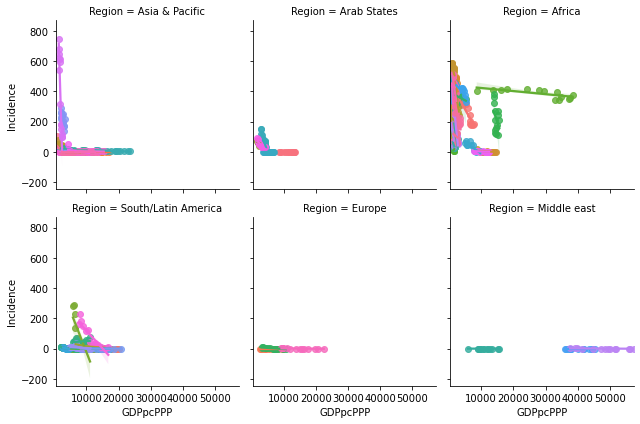

In [22]:
g = sns.FacetGrid(malaria_df, col='Region', hue='Country', col_wrap=3)
g.map(sns.regplot, 'GDPpcPPP', 'Incidence', fit_reg=True)
plt.show()

Here, colors represent individual countries within a region. When subsetting by both Region and Country it seems like for the most part increases in GDP per capita is associated with lower incidence. Additionally, countries that have zero incidence tend to stay that way as the GDP per capita increases. An interesting exception to the rule is a country in Africa, where increases in GDP per capita is very weakly correlated with decreasing incidence. We explored this country further in our Appendix.

### Analyzing Malaria Data through Modeling

In this section, we created models to determine if it was possible to predict trends in malaria incidence. We described the results and contextualize the results in the "Evaluation of Significance" section.

#### Analysis 1: Multivariable Regression of Temperature, **Country**, GDP per Capita, and Malaria Incidence (Registered Analysis)

We chose to explore the effects of temperature, region, and GDP on malaria incidence, since we wanted to determine if we could predict the emergence of new malaria cases (as opposed to prevalence, which accounts for both new and existing cases). Similarly, incidence reduces variability due to population effects since it is standardized. We previously wanted to perform linear regression on country rather than region, but we realized that this data was not useful since our coefficients for each country (and there are >100 countries) will only be applicable to only that specific country. Using regions instead is more informative since our coefficients are more generalizable than using country alone. However, we did perform a linear regression using country name as our independent variables.

##### Dropping NAs

In [23]:
countries = pd.get_dummies(malaria_df['Country']) #generating dummy variables for countries
incidence_model_vars = countries.columns.values.tolist()
incidence_model_vars.extend(['AverageTemperature', 'GDPpcPPP'])

malaria_df_countries = pd.concat([malaria_df, countries], axis=1).copy()
malaria_df_countries_no_na = malaria_df_countries.dropna(subset=incidence_model_vars).copy()

print('Without dropping any NAs, there are {} columns'.format(malaria_df_countries.shape[0]))
print('After dropping NAs for each of the variables of interest, there are {} columns'.
      format(malaria_df_countries_no_na.shape[0]))
print('Despite dropping NAs, we still retained majority of our observations.')

Without dropping any NAs, there are 1134 columns
After dropping NAs for each of the variables of interest, there are 1103 columns
Despite dropping NAs, we still retained majority of our observations.


In [24]:
malaria_df_countries_no_na.head()

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature,Afghanistan,...,Suriname,Tajikistan,Thailand,Togo,Turkey,Turkmenistan,Uganda,Uzbekistan,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Afghanistan,9.01,24.0,39263.0,32269589.0,Asia & Pacific,Global South,2015.514962,16.533625,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-01,Afghanistan,11.15,36.0,54840.0,31161376.0,Asia & Pacific,Global South,1914.774351,14.481583,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Afghanistan,18.87,40.0,77549.0,30117413.0,Asia & Pacific,Global South,1699.487997,15.518000,1,...,0,0,0,0,0,0,0,0,0,0
2010-01-01,Afghanistan,15.11,22.0,69397.0,29185507.0,Asia & Pacific,Global South,1710.575645,15.828667,1,...,0,0,0,0,0,0,0,0,0,0
2009-01-01,Afghanistan,14.77,32.0,64880.0,28394813.0,Asia & Pacific,Global South,1519.692548,15.257750,1,...,0,0,0,0,0,0,0,0,0,0


To make sure that our linear regression model was not overfitted, we performed cross validation by splitting the dataset into a training and a testing dataset.

We used a web page from [Machine Learning Mastery](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) to inform our testing procedures.

In [25]:
X = malaria_df_countries_no_na[incidence_model_vars]
Y = malaria_df_countries_no_na['Incidence']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=21)

_Note: The random state argument was added so that we got the same results every time we ran our code and we did not have to constantly update our explanations. The number 21 was chosen arbitrarily, which was chosen because 2021 was the year this project was done._

##### Training Model

In [26]:
incidence_training_model = LinearRegression()
incidence_training_model.fit(X_train, Y_train)
incidence_training_model_coeff = incidence_training_model.coef_[:]
print('The r^2 of the multivariate regression model using the training data is: {:.2f}'.
      format(incidence_training_model.score(X_train, Y_train)))

The r^2 of the multivariate regression model using the training data is: 0.93


For the training data, the current model explains about 93% of the variation of malaria incidence. Although the $r^2$ looks excellent, this is probably due to the inclusion of almost all countries and might be overfitted as it looks too good to be true. Additionally, the addition of a lot of variables in our The utility of this predictive model will be tested once we use our training dataset.

In [27]:
print('For GDPpcPPP, the regression coefficient is: {0:.3}'.format(incidence_training_model_coeff[-1]))
print('For Average Temperature, the regression coefficient is: {0:.3}'.format(incidence_training_model_coeff[-2]))

For GDPpcPPP, the regression coefficient is: -0.00289
For Average Temperature, the regression coefficient is: -3.98


There are too many independent variables in our model to print all of their regression coefficients, so we are only showing GDPpcPPP and Average Temperature. For every unit increase in average temperature, there is an average decrease of 3.98 in annual malaria incidence all else equal. This was surprising to us because the vector for malaria, _Anopheles sp._, prefer warmer climates. Secondly, we were surprised that GDP per capita does not seem to contribute much, which had a value of -0.00289. This means that for every unit increase in GDP per capita, there is a 0.003 reduction in malaria incidence. This was surprising since according to the seminal paper ([Gallup and Sachs, 2001](https://www.ncbi.nlm.nih.gov/books/NBK2624/)) and a recent follow up by ([Sarma et al., 2019](https://pubmed.ncbi.nlm.nih.gov/31628735/)), malaria and poverty are intrinsically linked. 

However, we realized that a unit increase in GDP per capita is essentially one international dollar adjusted for PPP. Thus, an additional 100.00 in GDP per capita is associated with a reduction of 0.3 in incidence rate on average. Since the incidence rate represents new cases per 1,000 people, that is an additional 300 people that would not get malaria on average annually.

##### Testing the model

We used the model trained with the training data to predict malaria incidence in our testing data. To evaluate the prediction accuracy, we used Mean Absolute Error to determine the extent of which the predicted malaria incidence matches the testing data incidence. We used the mean absolute error rather than the Root Mean Squared Error because it was much more interpretable.

In [28]:
incidence_prediction = incidence_training_model.predict(X_test)
mae = mean_absolute_error(Y_test, incidence_prediction)
print('The mean absolute error of our incidence model is: {:.2f}'.format(mae))

The mean absolute error of our incidence model is: 23.26


##### Testing Linear Model Assumptions 

In [29]:
actual_vs_predict = pd.DataFrame({'Test Data':Y_test, 'Predicted Data':incidence_prediction})
actual_vs_predict['Residuals'] = actual_vs_predict['Test Data'] - actual_vs_predict['Predicted Data']
actual_vs_predict.head()

,Test Data,Predicted Data,Residuals
Year,,,
2000-01-01,478.34,385.854016,92.485984
2009-01-01,90.50,118.348444,-27.848444
2001-01-01,681.26,339.522235,341.737765
2001-01-01,227.35,97.727083,129.622917
2000-01-01,7.18,8.176426,-0.996426


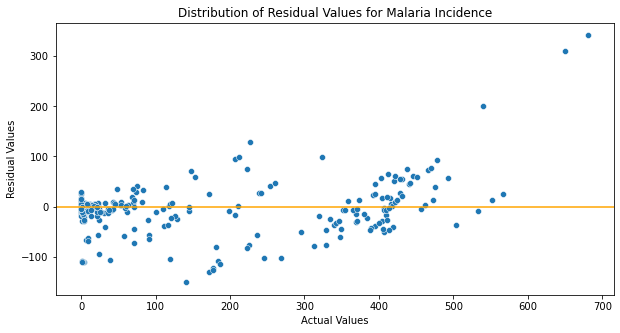

In [30]:
sns.scatterplot(x='Test Data', y='Residuals', data=actual_vs_predict)
plt.axhline(0, color='orange', linestyle='-')
plt.title('Distribution of Residual Values for Malaria Incidence')
plt.xlabel('Actual Values')
plt.ylabel('Residual Values')
plt.show()

Overall, the graph shows that residuals are randomly distributed, which means that the data points are independent. The residual values seem to also be distributed randomly, although there are some outliers in the residuals at the very top values. 

#### Analysis 2: Multivariable Regression of Temperature, **Region**, GDP per Capita, and Malaria Incidence

Instead of country, we wanted to see if our model still performed well on a regional level since this would be more robust compared to a model including all countries.

##### Dropping NAs

In [31]:
regions = pd.get_dummies(malaria_df['Region']) # generating dummy variables for regions
malaria_df = pd.concat([malaria_df, regions], axis=1).copy()

incidence_model_vars = ['Asia & Pacific', 'Arab States', 'Africa',
                        'South/Latin America', 'Europe', 'Middle east',
                        'AverageTemperature', 'GDPpcPPP']

malaria_df_no_na = malaria_df.dropna(subset=incidence_model_vars).copy() # making sure there are no NA values
print('Without dropping any NAs, there are {} columns'.format(malaria_df.shape[0]))
print('After dropping NAs for each of the variables of interest,there are {} columns'.
      format(malaria_df_no_na.shape[0]))
print('Dropping NAs did not significantly impact the number of variables in our dataset')

Without dropping any NAs, there are 1134 columns
After dropping NAs for each of the variables of interest,there are 1103 columns
Dropping NAs did not significantly impact the number of variables in our dataset


In [32]:
malaria_df_no_na.head()

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature,Africa,Arab States,Asia & Pacific,Europe,Middle east,South/Latin America
Year,,,,,,,,,,,,,,,
2013-01-01,Afghanistan,9.01,24.0,39263.0,32269589.0,Asia & Pacific,Global South,2015.514962,16.533625,0,0,1,0,0,0
2012-01-01,Afghanistan,11.15,36.0,54840.0,31161376.0,Asia & Pacific,Global South,1914.774351,14.481583,0,0,1,0,0,0
2011-01-01,Afghanistan,18.87,40.0,77549.0,30117413.0,Asia & Pacific,Global South,1699.487997,15.518000,0,0,1,0,0,0
2010-01-01,Afghanistan,15.11,22.0,69397.0,29185507.0,Asia & Pacific,Global South,1710.575645,15.828667,0,0,1,0,0,0
2009-01-01,Afghanistan,14.77,32.0,64880.0,28394813.0,Asia & Pacific,Global South,1519.692548,15.257750,0,0,1,0,0,0


##### Univariate linear regression model

We performed univariate linear regressions for each of our variables of interest to see which variables explained most of the variation in incidence.

In [33]:
for i in incidence_model_vars:
    linear_model = LinearRegression()
    linear_model.fit(malaria_df_no_na[[i]], malaria_df_no_na['Incidence'])
    b = linear_model.coef_[0]
    r2 = linear_model.score(malaria_df_no_na[[i]], malaria_df_no_na['Incidence'])
    
    print("The predictor variable is:", i)
    print("The slope of the model is: {:.3}".format(b))
    print("The r^2 of the model is: {:.3} \n".format(r2))

The predictor variable is: Asia & Pacific
The slope of the model is: -1.1e+02
The r^2 of the model is: 0.0756 

The predictor variable is: Arab States
The slope of the model is: -92.3
The r^2 of the model is: 0.0176 

The predictor variable is: Africa
The slope of the model is: 2.5e+02
The r^2 of the model is: 0.512 

The predictor variable is: South/Latin America
The slope of the model is: -1.4e+02
The r^2 of the model is: 0.119 

The predictor variable is: Europe
The slope of the model is: -1.27e+02
The r^2 of the model is: 0.0203 

The predictor variable is: Middle east
The slope of the model is: -1.28e+02
The r^2 of the model is: 0.0207 

The predictor variable is: AverageTemperature
The slope of the model is: 10.9
The r^2 of the model is: 0.119 

The predictor variable is: GDPpcPPP
The slope of the model is: -0.00646
The r^2 of the model is: 0.0946 



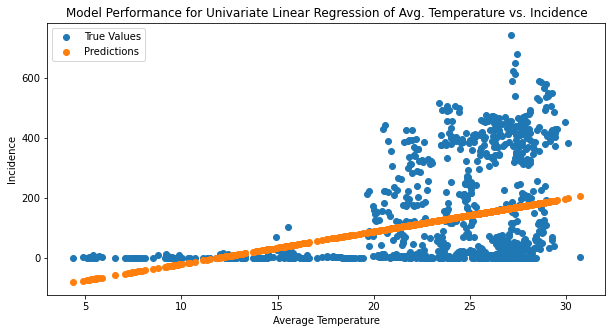

In [34]:
X = malaria_df_no_na['AverageTemperature'].to_numpy()
Y = malaria_df_no_na['Incidence'].to_numpy()
regr = LinearRegression()
regr.fit(X.reshape(-1,1),Y)
Y_pred= regr.predict(X.reshape(-1, 1))
plt.scatter(X, Y)
plt.scatter(X,Y_pred)
plt.title('Model Performance for Univariate Linear Regression of Avg. Temperature vs. Incidence')
plt.xlabel('Average Temperature')
plt.ylabel('Incidence')
plt.legend(['True Values', 'Predictions'])
plt.show()

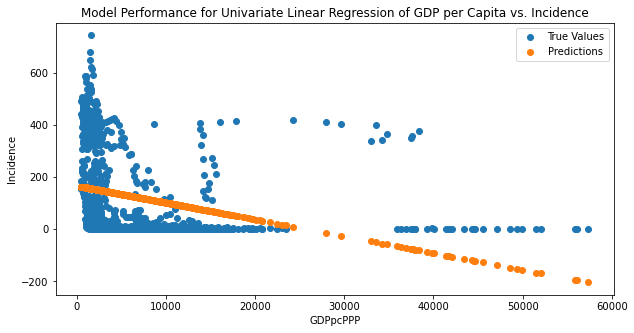

In [35]:
X = malaria_df_no_na['GDPpcPPP'].to_numpy()
Y = malaria_df_no_na['Incidence'].to_numpy()
regr = LinearRegression()
regr.fit(X.reshape(-1,1),Y)
Y_pred= regr.predict(X.reshape(-1, 1))
plt.scatter(X, Y)
plt.scatter(X,Y_pred)
plt.legend(['True Values', 'Predictions'])
plt.title('Model Performance for Univariate Linear Regression of GDP per Capita vs. Incidence')
plt.xlabel('GDPpcPPP')
plt.ylabel('Incidence')
plt.show()

Based on the univariable regressions performed, it seems like majority of the malaria incidence can be explained by being an African country, with an r^2 of 0.51. This makes sense since a lot of malaria incidence are concentrated in this region. Similar to our linear regression with countries, GDP per capita contributes about 9% of the variance and average temperature about 11%. Average Temperature is now positive, but since these are univariable regressions, it doesn't yet take into account all other variables that impact malaria incidence. We decided not to drop any of the variables for our multilinear regression model because we are still interested in how these variables together contribute to the overall explanation of malaria incidence.

##### Our multivariate linear regression model

To make sure that our linear regression model was not overfitted, we performed cross validation by splitting the dataset into a training and a testing dataset.

We used a web page from [Machine Learning Mastery](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) to inform our testing procedures.

In [36]:
X = malaria_df_no_na[incidence_model_vars]
Y = malaria_df_no_na['Incidence']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=21)

_Note: The random state argument was added so that we got the same results every time we ran our code and we did not have to constantly update our explanations. The number 21 was chosen arbitrarily, which was chosen because 2021 was the year this project was done._

##### Training Model

In [37]:
incidence_training_model = LinearRegression()
incidence_training_model.fit(X_train, Y_train)
incidence_training_model_coeff = incidence_training_model.coef_[:]
print('The r^2 of the multivariate regression model using the training data is: {:.2f}'.
      format(incidence_training_model.score(X_train, Y_train)))

The r^2 of the multivariate regression model using the training data is: 0.58


For the training data, the current model explains about 58% of the variation of malaria incidence. The model is not terrible, but could be improved with the consideration of other variables that contribute to malaria incidence. This shows that other than GDP per capita or average temperature, one or several unknown variables contribute to an additional 42% of the variation seen in malaria incidence. However, the previous model using countries rather than region is certainly way better.

In [38]:
for i in range(len(incidence_training_model_coeff)):
    print('For', incidence_model_vars[i], 'variable, the regression coefficient is: {:.3}'.format(incidence_training_model_coeff[i]))

For Asia & Pacific variable, the regression coefficient is: -29.6
For Arab States variable, the regression coefficient is: -72.4
For Africa variable, the regression coefficient is: 1.72e+02
For South/Latin America variable, the regression coefficient is: -74.3
For Europe variable, the regression coefficient is: 13.7
For Middle east variable, the regression coefficient is: -9.48
For AverageTemperature variable, the regression coefficient is: 7.33
For GDPpcPPP variable, the regression coefficient is: -0.00344


Being a South/Latin American country is associated with the lowest malaria incidence, all else equal. Being an African country is associated with the highest malaria incidence, all else equal. Unit increases in average temperature is associated with an increase of 7.33 in malaria incidence. By grouping data points by region rather than by countries, it seems like the temperature variable is somehow impacted by other variables in the model. Interestingly, the regression coefficient for GDPpcPPP is almost similar to the linear regression utilizing country rather than region, which means that this variable is independent of the other independent variables.

##### Testing the model

We used the model trained with the training data to predict malaria incidence in our testing data. To evaluate the prediction accuracy, we used Mean Absolute Error to determine the extent of which the predicted malaria incidence matches the testing data incidence. We used the mean absolute error rather than the Root Mean Squared Error because it was much more interpretable.

In [39]:
incidence_prediction = incidence_training_model.predict(X_test)
mae = mean_absolute_error(Y_test, incidence_prediction)
print('The mean absolute error of our incidence model is: {:.2f}'.format(mae))

The mean absolute error of our incidence model is: 78.44


##### Testing Linear Model Assumptions 

In [40]:
actual_vs_predict = pd.DataFrame({'Test Data':Y_test, 'Predicted Data':incidence_prediction})
actual_vs_predict['Residuals'] = actual_vs_predict['Test Data'] - actual_vs_predict['Predicted Data']
actual_vs_predict.head()

,Test Data,Predicted Data,Residuals
Year,,,
2000-01-01,478.34,296.756944,181.583056
2009-01-01,90.50,262.058127,-171.558127
2001-01-01,681.26,105.090706,576.169294
2001-01-01,227.35,33.148763,194.201237
2000-01-01,7.18,17.001282,-9.821282


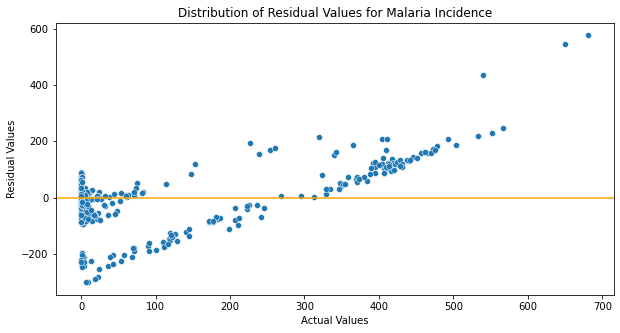

In [41]:
sns.scatterplot(x='Test Data', y='Residuals', data=actual_vs_predict)
plt.axhline(0, color='orange', linestyle='-')
plt.title('Distribution of Residual Values for Malaria Incidence')
plt.xlabel('Actual Values')
plt.ylabel('Residual Values')
plt.show()

In this model, residual values do not seem to be distributed randomly, which could mean that some of our independent variables were not independent. Similarly, there seems to be a trend where the model performs poorly when it comes to extreme values (like 0 or 700 incidence).

#### Analysis 3: K-Means Clustering

We performed a k-means clustering to identify relationships between malaria incidence and region. We were interested to learn if we could predict a region based on levels of malaria incidence and another variable, such as GDP or temperature. The results of the analysis are below.

##### Predicting Malaria Incidence from GDP and Average Temperature (Registered Analysis)

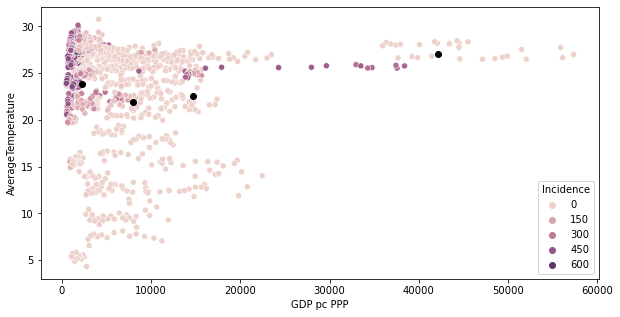

In [42]:
two_cols = malaria_df[['GDPpcPPP', 'AverageTemperature']]
two_cols = two_cols.dropna(axis=0)
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit(two_cols)

centers = kmeans.cluster_centers_
sns.scatterplot(x='GDPpcPPP', y='AverageTemperature', hue='Incidence', data=malaria_df)
plt.scatter(centers[:, 0], centers[:, 1], c='black')

plt.xlabel('GDP pc PPP')
plt.ylabel('AverageTemperature')
plt.show()

##### Predicting Region by Malaria Incidence and GDP
We performed K-Means clustering to see if it was possible to predict the region given incidence and GDP per capita (adjusted for PPP).

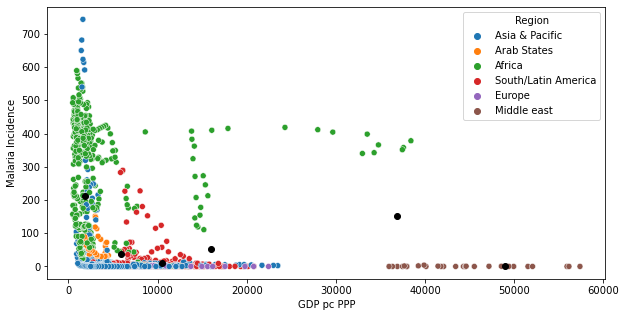

In [43]:
two_cols = malaria_df[['GDPpcPPP', 'Incidence']]
two_cols = two_cols.dropna(axis=0)
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit(two_cols)

centers = kmeans.cluster_centers_
sns.scatterplot(x='GDPpcPPP', y='Incidence', hue='Region', data=malaria_df)
plt.scatter(centers[:, 0], centers[:, 1], c='black')

plt.xlabel("GDP pc PPP")
plt.ylabel("Malaria Incidence")
plt.show()

##### Predicting Region by Malaria Incidence and Average Temperature

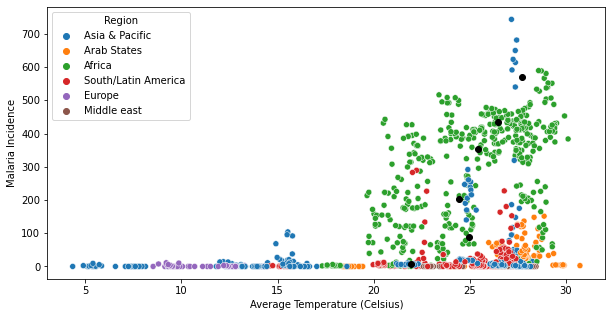

In [44]:
two_cols = malaria_df[['AverageTemperature', 'Incidence']]
two_cols = two_cols.dropna(axis=0)
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit(two_cols)

centers = kmeans.cluster_centers_
sns.scatterplot(x='AverageTemperature', y='Incidence', hue='Region', data=malaria_df)
plt.scatter(centers[:, 0], centers[:, 1], c='black')

plt.xlabel("Average Temperature (Celsius)")
plt.ylabel("Malaria Incidence")
plt.show()

#### Analysis 4: Multivariate logistic regression to predicting region using incidence, GDPpcPPP, and average temperatures

We wanted to see if we could predict region based on malaria incidence, GDPpcPPP, and average temperature data. Before doing so, we needed to label the regions.

In [45]:
le_region = preprocessing.LabelEncoder()
malaria_df_no_na['Region Labelled'] = le_region.fit_transform(malaria_df_no_na['Region'])
malaria_df_no_na.head()

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature,Africa,Arab States,Asia & Pacific,Europe,Middle east,South/Latin America,Region Labelled
Year,,,,,,,,,,,,,,,,
2013-01-01,Afghanistan,9.01,24.0,39263.0,32269589.0,Asia & Pacific,Global South,2015.514962,16.533625,0,0,1,0,0,0,2
2012-01-01,Afghanistan,11.15,36.0,54840.0,31161376.0,Asia & Pacific,Global South,1914.774351,14.481583,0,0,1,0,0,0,2
2011-01-01,Afghanistan,18.87,40.0,77549.0,30117413.0,Asia & Pacific,Global South,1699.487997,15.518000,0,0,1,0,0,0,2
2010-01-01,Afghanistan,15.11,22.0,69397.0,29185507.0,Asia & Pacific,Global South,1710.575645,15.828667,0,0,1,0,0,0,2
2009-01-01,Afghanistan,14.77,32.0,64880.0,28394813.0,Asia & Pacific,Global South,1519.692548,15.257750,0,0,1,0,0,0,2


##### Training Model

In [46]:
region_model_vars = ['GDPpcPPP', 'Incidence', 'AverageTemperature']
X = malaria_df_no_na[region_model_vars]
Y = malaria_df_no_na['Region Labelled']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=21)

In [47]:
region_training_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2200).fit(X_train, Y_train)
region_training_model_coeff = region_training_model.coef_[:]
print('The r^2 of the multivariate regression model using the training data is: {:.2f}'.
      format(region_training_model.score(X_train, Y_train)))

The r^2 of the multivariate regression model using the training data is: 0.58


Our r^2 shows that our model can explain 58% of the variation we see in region for our training data. 

**Note:** _We first chose newton-cg as our solver because the default solver does not accept multinomial dependent variables. We increased the max iterations it would take for the solver to converge, since the default max iteration (1000) throws an error saying 'newtow-cg' failed to converge.' Using the newton-cg solver had an r^2 of 0.67. However, even with increased iteration, we got an error saying the line search algorithm did not converge. Thus, we used the 'saga' solver instead since it did not throw any errors and required less iterations than the 'sag' solver._

## Evaluation of Significance

##### Analysis 1. Multivariate linear regression model of incidence as a function of country, average temperature, and GDP per capita.

We used the model trained with the training data to predict malaria incidence in our testing data. To evaluate the prediction accuracy, we used Mean Absolute Error to determine the extent of which the predicted malaria incidence matches the testing data incidence. We used the mean absolute error rather than the Root Mean Squared Error because it was much more interpretable.

Based on the Mean Absolute Error, we can expect an average difference of 23.36 in malaria incidence between our predicted malaria incidence versus actual incidence. Surprisingly, this was better than we thought because we assumed that since the training model is probably overfitted, there would be a huge difference in the residuals. However, we were surprised that it performed well on the test data. Still, that error is still large, because the error is about as large as the average of Arab States and Asia & Pacific. Still overall, that difference is between the range of the median incidence rate, which between 10 to 30 from 2000-2013.

##### Analysis 2. Testing multivariate linear regression model of incidence as a function of region, average temperature, and GDP per capita.

Based on the Mean Absolute Error, we can expect an average difference of 78.44 in malaria incidence between our predicted malaria incidence versus actual incidence. A difference of that magnitude seems to suggest that our model is not very accurate at predicting malaria incidence, as average incidence rates (other than Africa), do not reach that high. For the year 2013 for example, the second highest incidence rate was only 23.85. The upper limit of the 95% confidence interval for malaria incidence in global regions, other than Arab States and Africa, have not reached incidence rates close the Mean Absolute Error between 2000-2013. Starting on 2006, the upper limit of the 95% confidence interval for malaria incidence in the Arab States region fall below the incidence rate of 80. This shows that the model has the potential to significantly overestimate malaria incidence rates. Lastly, this model does poorly compared to our first model since it has a higher mean absolute error.

##### Analysis 3. K-Means Clustering

There is no clear groupings of different incidence rates based on GDP and malaria as we expected. In addition to this graph being minimally informative, we also recieved feedback from TAs and peers that predicting a non-categorical value like incidence would not be the best use of K-means in this case. As a result, we subsequently transitioned to using K-means to predict region based on malaria incidence and other factors. We are reporting this graph because we committed to do so, although we did not draw final conclusions from it. 

The k-means analysis of countries based on malaria incidence and GDP did not produce any insightful information. We expected the plot of the relationship between GDP and malaria incidence to be linear, however the plot shows significant clustering of low GDP countries with some having high malaria incidence.

Clustering with average temperature and malaria incidence does not reveal clear distinctions between regions either, however it is noteworthy that the cluster centers produced appear in an almost positive linear fashion. It is also notable that countries, primarily in Africa, tend to see much higher malaria incidence at 20 degrees celcius and above.

##### Analysis 4. Testing multinomial logistic regression model of region as a function of incidence, average temperature, and GDP per capita.

Since there are 6 regions in the dataset, there is a 16.67% chance of being right about what region it would be (choosing randomly) if given information about the malaria incidence, average temperature, and GDP per capita (adjusted for PPP). Thus, our model being 54.95% accurate means that our model significantly improves from just guessing randomly. However, the model could be improved upon given additional variables.

**Note:** _When we used newton-cg, we got a prediction accuracy of 62.36%. This is 7.41% better, but we stuck with our current model since it was still a significant improvement and there were no errors associated with it._

##### Differences in malaria incidence per world region in 2013

In [48]:
incidence_region_model = ols('Incidence ~ Region', data=year_2013).fit()
aov_table = sm.stats.anova_lm(incidence_region_model)
print(aov_table)

            df         sum_sq        mean_sq          F        PR(>F)
Region     5.0  991222.021522  198244.404304  19.159191  3.105395e-12
Residual  75.0  776041.667732   10347.222236        NaN           NaN


Our ANOVA test produced p < 0.0001. Thus, there seems to be a significant difference between the regions when it comes to malaria incidence, because the F value of 19.15 is higher than the critical value of 3.10e-12. Unfortunately, the ANOVA does not indicate between which groups there is a statistically significant difference, but we suspected this may have been due to Africa. This is because in our previous analysis it was obvious in our initial data analysis that Africa had higher incidence compared to other regions. Thus, we performed another ANOVA excluding Africa.

##### Differences in malaria incidence per world region in 2013 (excluding Africa)

In [49]:
incidence_region_model = ols('Incidence ~ Region', data=year_2013[year_2013['Region']!='Africa']).fit()
aov_table = sm.stats.anova_lm(incidence_region_model)
print(aov_table)

            df        sum_sq      mean_sq         F    PR(>F)
Region     4.0   3456.333308   864.083327  0.668888  0.616957
Residual  45.0  58131.964390  1291.821431       NaN       NaN


Our ANOVA test excluding Africa produced p=0.62, which means that there isn't a statistically significant difference between world regions. As expected, the ANOVA without Africa indicates less differences in malaria incidence between regions (excluding Africa) in 2013.

## Interpretation and Conclusions

The exploratory analysis revealed a number of trends. First, malaria incidence has been declining worldwide since 2003. Africa has the highest number of deaths among regions, followed by Arab states and then Asia & Pacific. The other regions have almost none. Given that malaria is transmitted most easily in warm climates, we are actually surprised that this relationship is not stronger. With further research on this topic, we were able to determine that the optimal temperature conditions for _Plasmodium falciparum_ and _P. vivax_ (the malaria parasites) and _Anopheles gambiae_ (the vector mosquito) were all near 23-24 degrees Celsius ([Ikemoto, 2008](https://pubmed.ncbi.nlm.nih.gov/19058618/)). With this, it has been found that higher temperatures would also not be optimal, making the very strong positive correlation we anticipated less reasonable.

Our first analysis, the multivariable regression with country, revealed a number of relationships relating to malaria incidence. The regression coefficient of the average temperature variable and incidence is -3.98, meaning that for every degree increase in temperature, the incidence of malaria decreases by 3.98 on average all else equal. However, if we consider regions rather than by country (like in analysis 2), the regression coefficient of the average temperature variable is 7.33, meaning that for every degree increase in temperature, the incidence of malaria increases by 7.33 on average all else equal. Between the two multivariate models, the only difference was changing country to region. When comparing the two multivariate models, the slope of the regression of average temperature and Incedence was negative by country data, but positive with region data. We believe this is an example of Simpson’s Paradox, where a trend can be negative for separate groups, but positive when the groups are combined as the distribution of data points changes overall. We explored how grouping the datasets differently were affected in our Appendix.

In our report, it looks that malaria incidence may be dependent on other factors that are more important for successful transmission of malaria vectors, like vegetation, temperature, humidity, and altitude. To be sure we were not missing anything, we tried grouping the data and finding correlation coefficients between GDP and incidence within different groups. For example we looked at correlation between the two within different countries, and regions. It seems that a lower GDP did not cause higher malaria incidence, but rather lower GDP is a contributing factor that is important for malaria control. However, it is important to note that because the reporting of national statistics are systematically different in differen countries, the malaria incidence we are analyzing may not be the most accurate data to compare across countries ([Gallup and Sachs, 2001](https://www.ncbi.nlm.nih.gov/books/NBK2624/); [Sarma et al., 2019](https://pubmed.ncbi.nlm.nih.gov/31628735/)).

Our exploratory analysis and data analyses revealed a moderate relationship between temperature and malaria incidence, and region and malaria incidence. We also found that GDP per capita and malaria incidence had a moderate relationship, but this dependent on how the data points were grouped. We conclude that temperature, GDP per capita, and country are factors that can help predict the risk of high malaria severity in a country. However, we note that there may be other variables important to the risk of malaria that were not included in our models. With regard to why temperature and region are predictors of malaria incidence - temperature affects the ability of mosquitoes to transmit the _Plasmodium_ parasite, so temperature makes sense as a predicting variable; region may include a number of factors that we did not discuss here, including culture, or a government's ability to manage an effective healthcare system.

Research aiming to contextualize the outliers on our box plots revealed additional relevant factors that impact malaria case counts.  For example, countries in political turmoil (South Sudan), with historically inequitable and limited healthcare resources (India), or with close proximity to Amazon river (Brazil), all had extremely high malaria counts. In this way, our outlier exploration encouraged us to look beyond the obvious factors we were analyzing and elucidated the multifaceted nature of public health. Beyond just temperature and GDP, the contexts of malaria rates in each country or region are wholly unique. When looking at massive datasets at an overview level, it was initially frustrating that the factors we were looking at were not more strongly correlated. By analyzing these outliers and contextualizing the data in regards to what was happening in each country, it became clear that these overview-level statistics were an aspect in a much bigger picture of understanding the environmental, political, cultural, and economic factors that contribute to malaria’s spread. A country-specific analysis of the aforementioned factors is included in the appendix. Diving further into these variables may provide valuable insights in a future analysis.

## Limitations

Our project is limited in some ways by its broad scope. The topic we chose is relevant across the world, and as we planned our project, we were very eager to include more and more factors (temperature, gdp, etc). As a result,  we had massive amounts of data to analyze and our project became more broad and shallow than deep and narrow. Though the professor encouraged us that this type of project would also be successful, we wish we could have dove deeper into the tangential components as well. For example, if we had unlimited time, we would have done more research to explore outlier values that we discovered. We also would have looked deeper into Africa specifically and broken those numbers down by region. Africa experienced by far the highest levels of malaria cases per capita, and a future study could compare Africa countries that have similar climates that differ by other variables such as GDP or development of their healthcare system. Overall, this is an exciting topic with many avenues for future exploration! It was difficult to feel that this project was ever "complete," as we would be excited to continue expanding this project indefinitely. 

Another limitation is our K-means analysis. As our attempts indicate, it seems that K-means is not the best method for us to find significant results. As we identified, the relationship is non-linear and there are no clear clusters on our graph. K-means can only cluster data based on their linear relationship, and is not effective in this case. 

A further limitation of the project is that the timeframe of this project only encompasses dates 2000-2013. This is because the most recent data available for GDP and temperature is in 2013, so our dataset could only include records as recent as that year. Additionally, our project could have been stronger if we had been able to incorporate historical data (i.e. including temperatures and malaria stats from past centuries). This way we could have looked at how changing temperatures through global warming have impacted malaria over the years. 

In general sense, the nature of the structure of the project was somewhat limited. Instead of designing a study to answer our research question, we had to shape our project based on the data we could find that addressed the question. In this way, the available data played a bigger role in the direction of our project than we would have liked. If we were able to take ownership of the data collection, we also would have a better understanding of data collection methods, making explanations of outliers easier. 



## Source Code

Datasets and codebooks are available [here](https://github.com/mcuadera/info_2950_malaria_project).

## Acknowledgements

We would like to acknowledge the World Health Organization for providing detailed data on malaria incidence worldwide. Allowing this data to be accessed by all allows anyone to assist in the effort to curb the spread of this disease. We would also like to thank our Section TA Heather Ginsburg for her clear lectures and guidance on this project.

## Appendix:

#### Data Cleaning Description

Our data cleaning process to produce our curated final dataset can be found [here](https://github.com/mcuadera/info_2950_malaria_project/blob/main/phase_submissions/data_cleaning_malaria_project.ipynb).

#### Sources Cited

Beaumont, P. (2019). Burundi malaria outbreak at epidemic levels as half of population infected. The Guardian. https://www.theguardian.com/global-development/2019/aug/08/burundi-malaria-outbreak-at-epidemic-levels-as-half-of-population-infected

Berkley Earth. (2017). _Climate Change: Earth Surface Temperature Data_. https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

Brownlee, J. (2020). Train-Test Split for Evaluating Machine Learning Algorithms. Machine Learning Mastery.

Centers for Disease Control and Prevention. (2020). Where Malaria Occurs. Malaria. https://www.cdc.gov/malaria/about/distribution.html

Eggers, E. K. (2006). Historical dictionary of Burundi. Scarecrow Press. http://search.ebscohost.com/login.aspx?direct=true&scope=site&db=nlebk&AN=238276

Gallup, J. L., & Sachs, J. D. (2001). The economic burden of malaria. The American Journal of Tropical Medicine and Hygiene, 64(1_suppl), 85–96.

Ikemoto, T. (2008). Tropical malaria does not mean hot environments. Journal of Medical Entomology, 45(6), 963–969. https://doi.org/10.1603/0022-2585(2008)45[963:tmdnmh]2.0.co;2

International Committee of the Red Cross. (n.d.). South Sudan refugee crisis. https://www.icrc.org/en/where-we-work/africa/south-sudan/south-sudan-refugees

Oliveira-Ferreira, J., Lacerda, M. V., Brasil, P., Ladislau, J. L., Tauil, P. L., & Daniel-Ribeiro, C. T. (2010). Malaria in Brazil: an overview. Malaria Journal, 9(1), 115. https://doi.org/10.1186/1475-2875-9-115

Sarma, N., Patouillard, E., Cibulskis, R. E., & Arcand, J.-L. (2019). The Economic Burden of Malaria: Revisiting the Evidence. The American Journal of Tropical Medicine and Hygiene, 101(6), 1405–1415. https://doi.org/10.4269/ajtmh.19-0386

The World Bank Group. (2019). GDP per capita, PPP (current international $). https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

World Health Organization. (2019a). Malaria. Global Health Observatory Data Repository. https://apps.who.int/gho/data/node.main.A1362?lang=en

World Health Organization. (2019b). The “World malaria report 2019” at a glance. Newsroom. https://www.who.int/news-room/feature-stories/detail/world-malaria-report-2019

#### Tangential Findings

##### Outlier Analysis

In [50]:
year_2013[year_2013['Region']=='Africa'].sort_values(by='Confirmed Cases', ascending=False).head(1)

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,Burundi,140.59,3411.0,4141387.0,9540289.0,Africa,Global South,740.984231,20.86275


Burundi and Brazil are two more outlier countries with high malaria incidence. Burundi is one of the poorest countries in the world, and suffers from corruption, war, and a lack of an organized healthcare system (Egers, 2006). The UN also blames low preventative measures and a population with low levels of resistance for the exceptionally high malaria cases ([Beaumont, 2019](https://www.theguardian.com/global-development/2019/aug/08/burundi-malaria-outbreak-at-epidemic-levels-as-half-of-population-infected)).

In [51]:
year_2013[year_2013['Region']=='Asia & Pacific'].sort_values(by='Confirmed Cases', ascending=False).head(1)

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,India,9.16,440.0,881730.0,1.280846e+09,Asia & Pacific,Global South,5057.217581,25.41325


As the second most populous country in the world, it is not surprising that the number of confirmed cases is exceptionally high in India. Even given the high population, however, India also takes on a high malaria burden as well ([WHO, n.d.](https://www.who.int/india/health-topics/malaria#:~:text=According%20to%20the%20WMR%202019,of%2050.5%25%20compared%20with%202017.&text=India%20has%20a%20vision%20of,2027%20and%20elimination%20by%202030)). With 80% of healthcare privatized, India is known for limited healthcare access for large portions of its population. In this way, inequitable established healthcare systems can impact the amount of malaria cases. This is another relevant factor not included in our modeling. A model that incorporated factors like these would likely have a higher predictive accuracy ([D'cruz, 2020](https://blogs.bmj.com/medical-humanities/2020/06/25/social-inequity-and-access-to-mental-healthcare-in-india-during-the-covid-19-pandemic/#:~:text=With%2080%25%20of%20healthcare%20in,%25)).

In [52]:
year_2013[year_2013['Region']=='Arab States'].sort_values(by='Confirmed Cases', ascending=False).head(1)

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,Sudan,31.45,685.0,592383.0,37072550.0,Arab States,Global South,4189.448778,28.572


In the confirmed cases boxplot, there is an obvious outlier in the Arab States category. Further analysis revealed that this point was South Sudan. In 2013, the South Sudanese Civil war internally displaced two million people and plagued the country with widespread violence. Displacement and violence on this scale would disrupt existing healthcare structures and curb preventative malaria infection measures. Additionally, refugees entering South Sudan from non-endemic areas come with an increased malaria risk ([ICRC, n.d.](https://www.icrc.org/en/where-we-work/africa/south-sudan/south-sudan-refugees)). Considering this context, and understanding that malaria-controlling public health efforts would have been limited at this time, the extremely high case count in 2013 is unsurprising. The high case count in South Sudan indicates that factors beyond those that we analyzed play a significant role in malaria infection. Aspects such as population movement and political turmoil can have a drastic impact on malaria, and these are factors that were not considered in our analysis. Our predictive modeling would be stronger if we were also able to incorporate factors like governmental stability. 

In [53]:
year_2013[year_2013['Region']=='South/Latin America'].sort_values(by='Confirmed Cases', ascending=False).head(1)

,Country,Incidence,Deaths,Confirmed Cases,Total Population,Region,Global South,GDPpcPPP,AverageTemperature
Year,,,,,,,,,
2013-01-01,Brazil,4.82,40.0,168862.0,201035903.0,South/Latin America,Global South,15588.72621,25.348125


Brazil’s rainforest climate around the Amazon river allows mosquitoes carrying the parasite to thrive, and the country’s settlement expansion in the area from the 1960s on have contributed to the high levels of malaria incidence. ([Oliveira-Ferreira et al., 2010](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2891813/#:~:text=Although%20the%20main%20mosquito%20vector,and%20impair%20the%20use%20of))

##### Equitorial Guinea

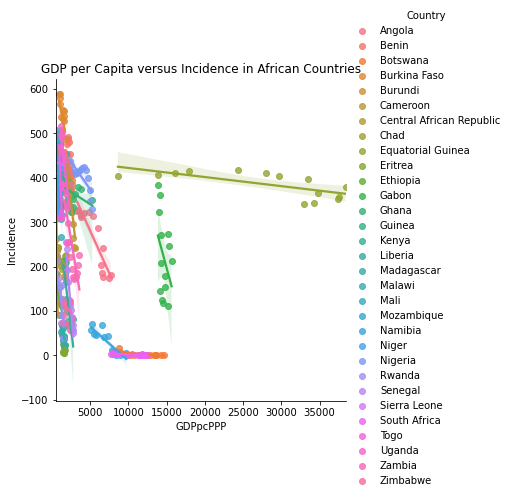

In [54]:
sns.lmplot(x='GDPpcPPP', y='Incidence', hue='Country', data=malaria_df[malaria_df['Region']=='Africa'], fit_reg=True)
plt.title('GDP per Capita versus Incidence in African Countries')
plt.show()

The country with a constant malaria incidence rate is Equatorial Guinea. Unlike other African countries, it has not significantly reduced malaria incidence as the GDP per capita increases. This graph implies a stable population of malaria incidence in the country, which is quite high at an incidence rate hovering around 400.

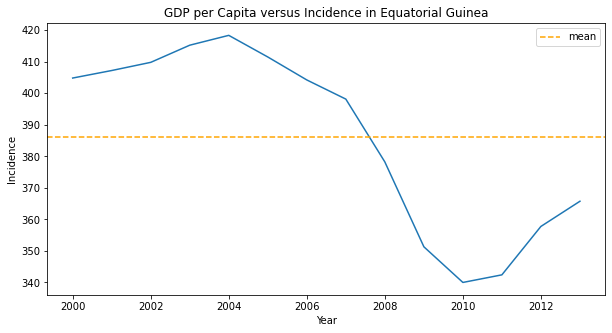

In [55]:
sns.lineplot(x='Year', y='Incidence', data=malaria_df[malaria_df['Country']=='Equatorial Guinea'])
plt.axhline(malaria_df[malaria_df['Country']=='Equatorial Guinea']['Incidence'].mean(), color='orange', linestyle='--', label='mean')
plt.title('GDP per Capita versus Incidence in Equatorial Guinea')
plt.legend()
plt.show()

The orange line represents the 13-year average for incidence for the country. Malaria has a significant burden in this country, as it is the second leading cause of death ([CDC, 2021](https://www.cdc.gov/globalhealth/countries/guinea/default.htm)).

##### Confirmed Cases Supplemental Analysis

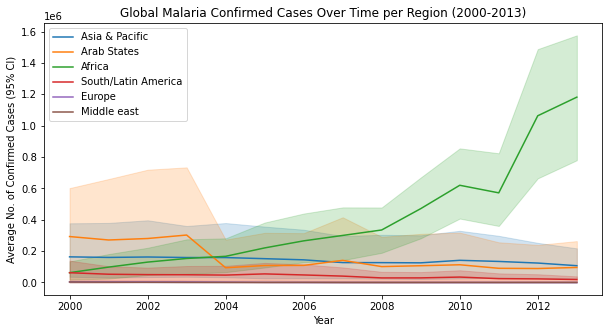

In [56]:
sns.lineplot(x='Year', y='Confirmed Cases', hue='Region', data=malaria_df)
plt.title('Global Malaria Confirmed Cases Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Cases (95% CI)')
plt.legend()
plt.show()

We see that the average malaria confirmed cases in Africa have increased over time, while other regions either have lowered average cases or have stabilized. We created a separate graph excluding Africa so we can better see the trends in average malaria confirmed cases in the other regions.

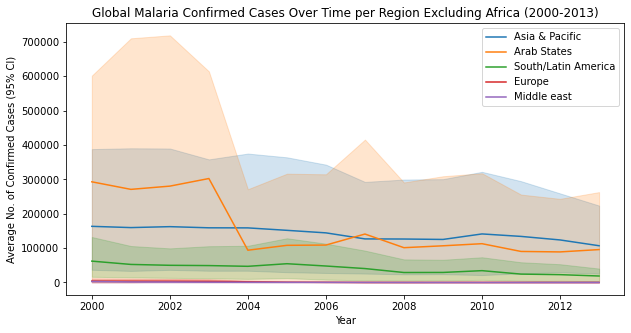

In [57]:
sns.lineplot(x='Year', y='Confirmed Cases', hue='Region', data=malaria_df[malaria_df['Region']!='Africa'])
plt.title('Global Malaria Confirmed Cases Over Time per Region Excluding Africa (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Cases (95% CI)')
plt.legend()
plt.show()

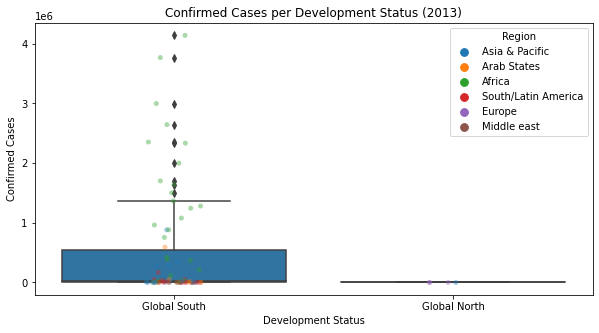

In [58]:
sns.boxplot(x='Global South', y='Confirmed Cases', data=year_2013)
sns.stripplot(x='Global South', y='Confirmed Cases', hue='Region', data=year_2013, alpha=0.4)
plt.xlabel('Development Status')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases per Development Status (2013)')
plt.show()

As anticipated, the number of cases in the Global South is greater than the number of cases in the Global North. This also reveals a larger number of outliers in the South than the North, with African countries being disproportionally affected by malaria.

##### Malaria Deaths Supplemental Analysis

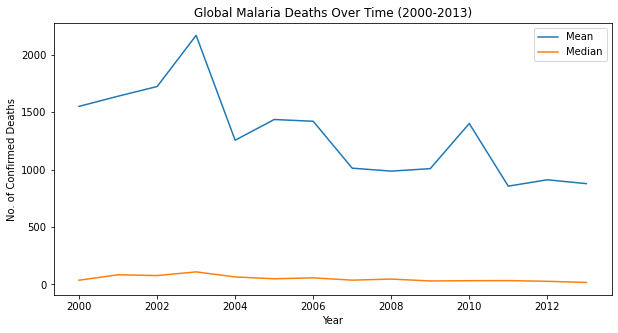

In [59]:
plt.plot(by_year['Deaths'].mean(), label='Mean')
plt.plot(by_year['Deaths'].median(), label='Median')
plt.title('Global Malaria Deaths Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Deaths')
plt.legend()
plt.show()

We found that overall confirmed deaths due to malaria has decreased over time. Apart from the peak in 2010, average malaria deaths have stagnated around 1,000 starting in 2007. The median deaths seems to be the same overall, but we suspected it could be due to the inclusion of mean deaths in the graphs so we created a separate graph for it.

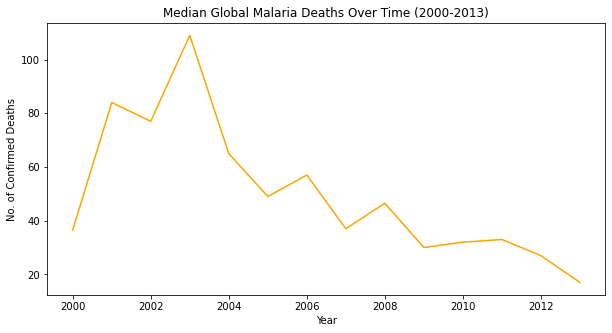

In [60]:
plt.plot(by_year['Deaths'].median(), color='orange')
plt.title('Median Global Malaria Deaths Over Time (2000-2013)')
plt.xlabel('Year')
plt.ylabel('No. of Confirmed Deaths')
plt.show()

We see that deaths due to malaria increased from 2000 through 2003, but then decreased after that. In the latest year of the dataset, the median number of confirmed deaths was less than 20. 

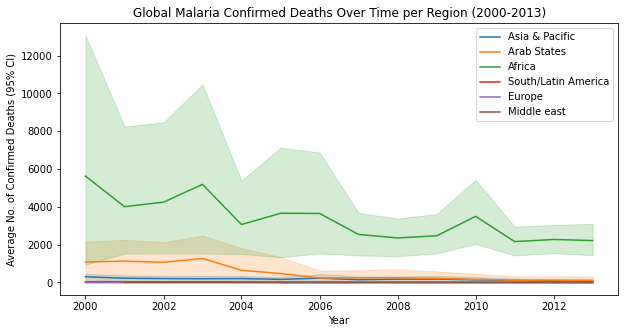

In [61]:
sns.lineplot(x='Year', y='Deaths', hue='Region', data=malaria_df)
plt.title('Global Malaria Confirmed Deaths Over Time per Region (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Deaths (95% CI)')
plt.legend()
plt.show()

In each region, deaths have decreased over time. Africa still has the most number of average deaths. Average number of confirmed deaths in other regions seems negligible compared to Africa. However, we zoomed into the data to get a better picture of what is occuring in other regions.

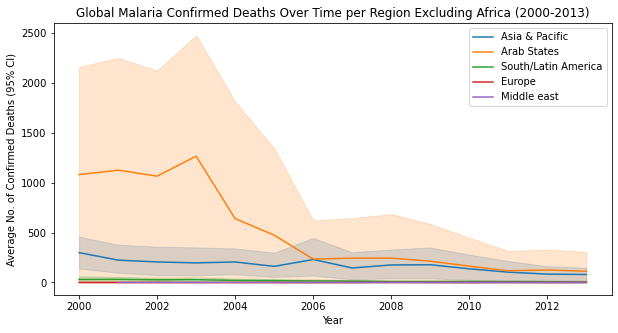

In [62]:
sns.lineplot(x='Year', y='Deaths', hue='Region', data=malaria_df[malaria_df['Region']!='Africa'])
plt.title('Global Malaria Confirmed Deaths Over Time per Region Excluding Africa (2000-2013)')
plt.xlabel('Year')
plt.ylabel('Average No. of Confirmed Deaths (95% CI)')
plt.legend()
plt.show()

In the other regions, we saw that there have been a decrease in average malaria confirmed cases such as in the Arab States and Asia & Pacific. For other regions, the average numer of deaths is miniscule, with the other regions having fairly small number of deaths due to malaria.

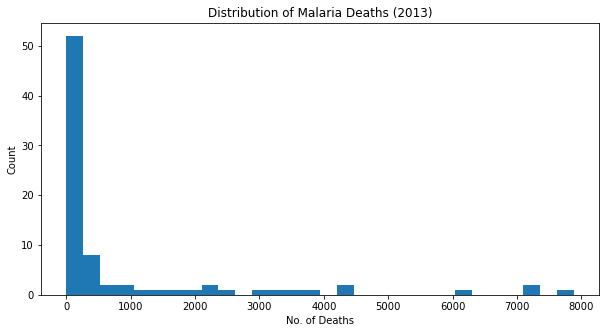

In [63]:
plt.hist(year_2013['Deaths'], bins=30)
plt.title('Distribution of Malaria Deaths (2013)')
plt.xlabel('No. of Deaths')
plt.ylabel('Count')
plt.show()

Similar to the distribution of incidence, most countries have really low death numbers but that other countries have a wide distribution regarding malaria deaths in 2013.

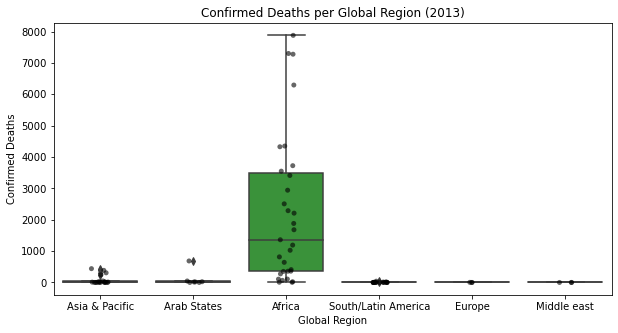

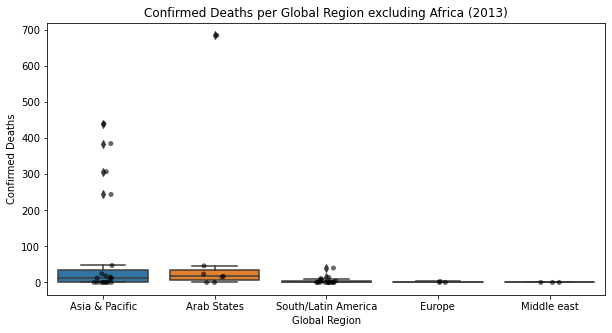

In [64]:
sns.boxplot(x='Region', y='Deaths', data=year_2013)
sns.stripplot(x='Region', y='Deaths', data=year_2013, color='black', alpha=0.6)
plt.title('Confirmed Deaths per Global Region (2013)')
plt.xlabel('Global Region')
plt.ylabel('Confirmed Deaths')
plt.show()

sns.boxplot(x='Region', y='Deaths', data=year_2013[year_2013['Region']!='Africa'])
sns.stripplot(x='Region', y='Deaths', data=year_2013[year_2013['Region']!='Africa'], color='black', alpha=0.6)
plt.title('Confirmed Deaths per Global Region excluding Africa (2013)')
plt.xlabel('Global Region')
plt.ylabel('Confirmed Deaths')

plt.show()

The graphs show that Africa has the highest number of deaths compared to the other regions. All other regions have very small number of deaths in 2013, but we thought that the inclusion of Africa might have skewed the other regions to Africa having more malaria deaths and more variations in its data.

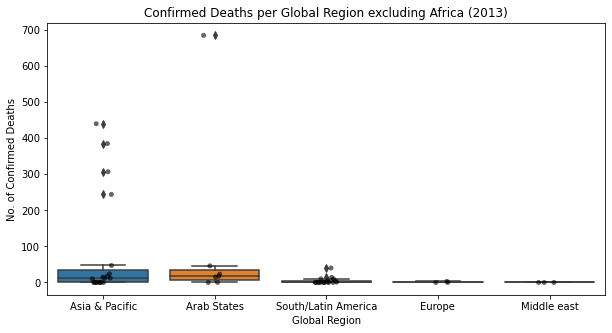

In [65]:
sns.boxplot(x='Region', y='Deaths', data=year_2013[year_2013['Region']!='Africa'])
sns.stripplot(x='Region', y='Deaths', data=year_2013[year_2013['Region']!='Africa'], color='black', alpha=0.6)
plt.title('Confirmed Deaths per Global Region excluding Africa (2013)')
plt.xlabel('Global Region')
plt.ylabel('No. of Confirmed Deaths')
plt.show()

We see that the malaria deaths in Arab States and Asia & Pacific are about the same. However, there are more Asia & Pacific countries that have significantly higher number of deaths. Nonetheless, one country in the Arab States had the highest number of confirmed deaths. There seems to be one outlier in South/Latin America when it comes to confirmed deaths.

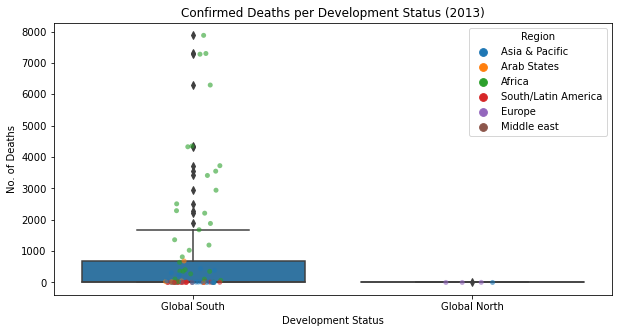

In [66]:
sns.boxplot(x='Global South', y='Deaths', data=year_2013)
sns.stripplot(x='Global South', y='Deaths', hue='Region', data=year_2013, alpha=0.6)
plt.title('Confirmed Deaths per Development Status (2013)')
plt.xlabel('Development Status')
plt.ylabel('No. of Deaths')
plt.show()

Similar to trends in incidence, more deaths occured in the Global South compared to the Global North. However, there were a lot of outliers in the Global South, which means that several countries are disproportionally affected with malaria. These countries are African countries exclusively. 

##### GDPpcPPP Supplemental Analysis

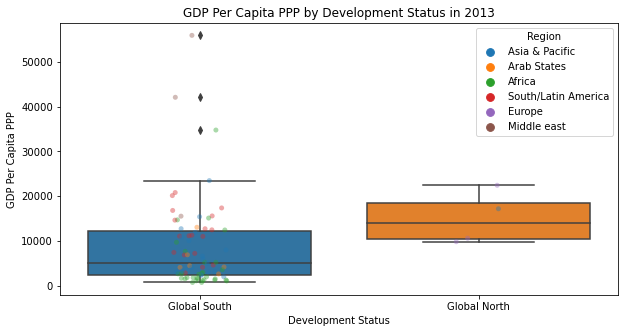

In [67]:
sns.boxplot(x='Global South', y='GDPpcPPP', data=year_2013)
sns.stripplot(x='Global South', y='GDPpcPPP', hue='Region', data=year_2013, alpha=0.4)
plt.title('GDP Per Capita PPP by Development Status in 2013')
plt.xlabel('Development Status')
plt.ylabel('GDP Per Capita PPP')
plt.show()

As anticipated, the GDP of Global North countries is higher that that of Global South countries. It is logical that there would be a difference between the GDP of regions of different developmental status. Surprisingly, there are some outliers in the Global South that are much greater. 

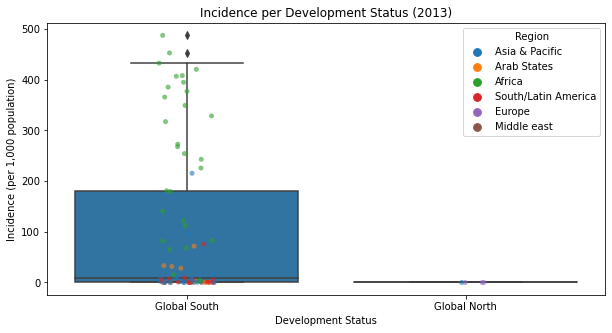

In [68]:
sns.boxplot(x='Global South', y='Incidence', data=year_2013)
sns.stripplot(x='Global South', y='Incidence', hue='Region', data=year_2013, alpha=0.6)
plt.title('Incidence per Development Status (2013)')
plt.xlabel('Development Status')
plt.ylabel('Incidence (per 1,000 population)')
plt.show()

Unsurprisingly, countries considered to be higher income (Global North) have lower incidence than lower income countries (Global South). It is worth noting that compared to Global South, there are very few countries included in the Global North. However, even countries in the Global South seem to have the same number of incidence as countries in the Global North, which could suggest that socioeconomic status of a country may not necessarily be indicative of malaria cases and that other variables are at play. 

##### Temperature and Incidence Supplemental Analysis

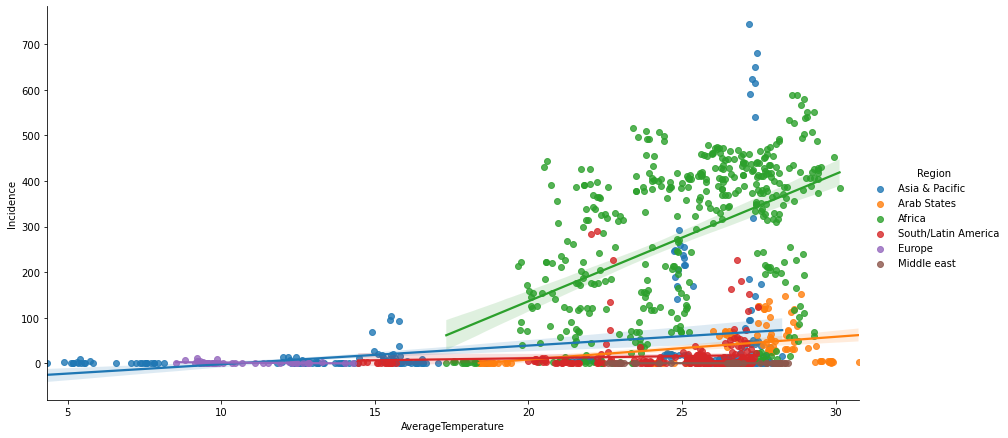

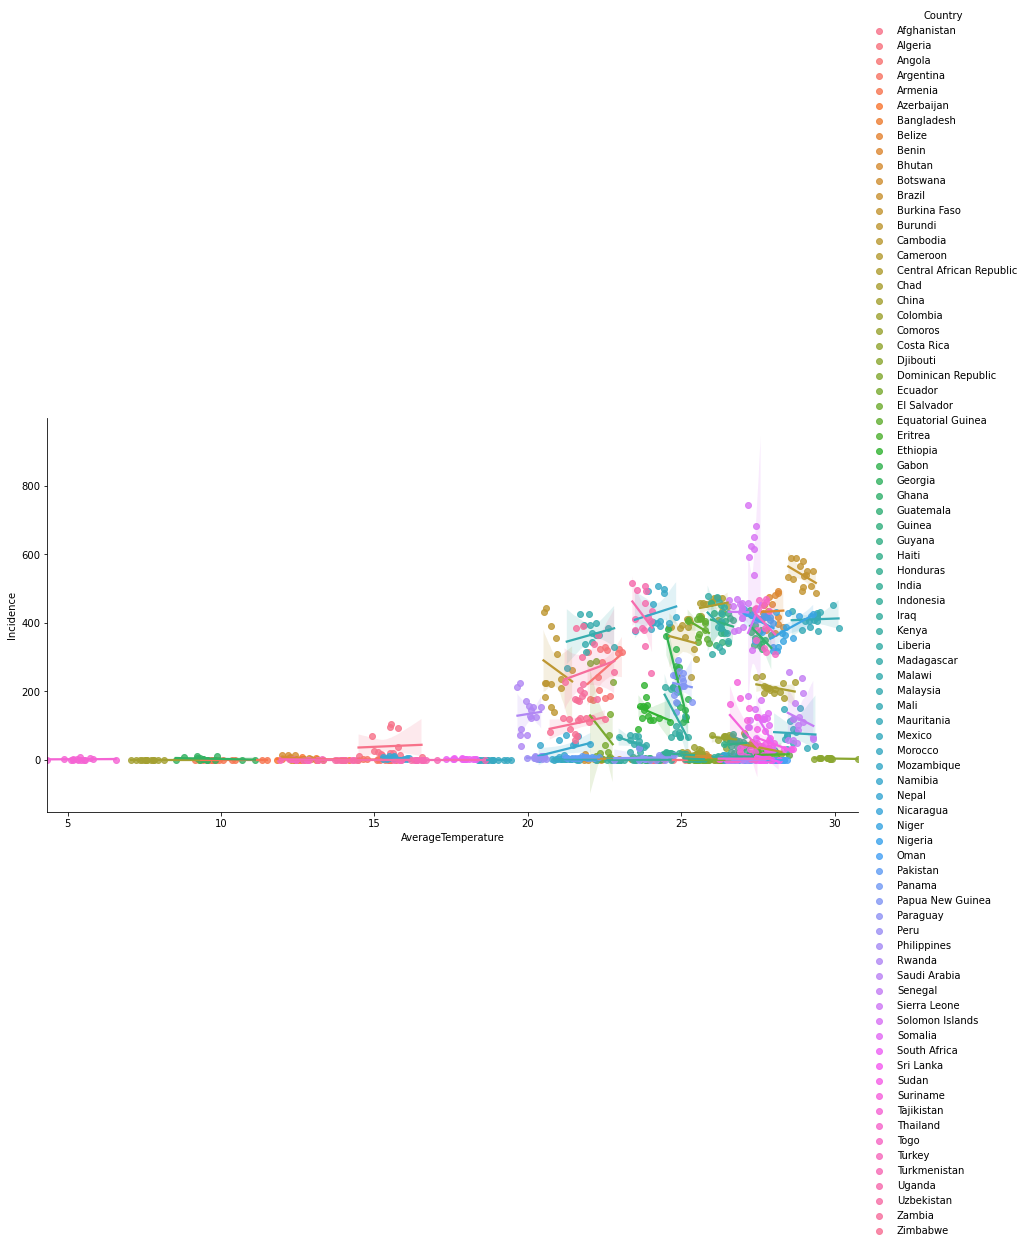

In [69]:
sns.lmplot(x='AverageTemperature', y='Incidence', hue='Region', data=malaria_df, fit_reg=True, height=6, aspect=2)
plt.show()

sns.lmplot(x='AverageTemperature', y='Incidence', hue='Country', data=malaria_df, fit_reg=True, height=6, aspect=2)
plt.show()

On a regional level, average temperatures and incidence seems to be positively correlated. However, if the data points are grouped by country instead, there does not seem to be a strong correlation, with some countries exhibiting positive, negative, or even no correlation.